**Tutorial 5 (Implement into the Tensor flow firstly then into Pytorch)**

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values (0–255 → 0–1)
train_images = train_images / 255.0
test_images = test_images / 255.0


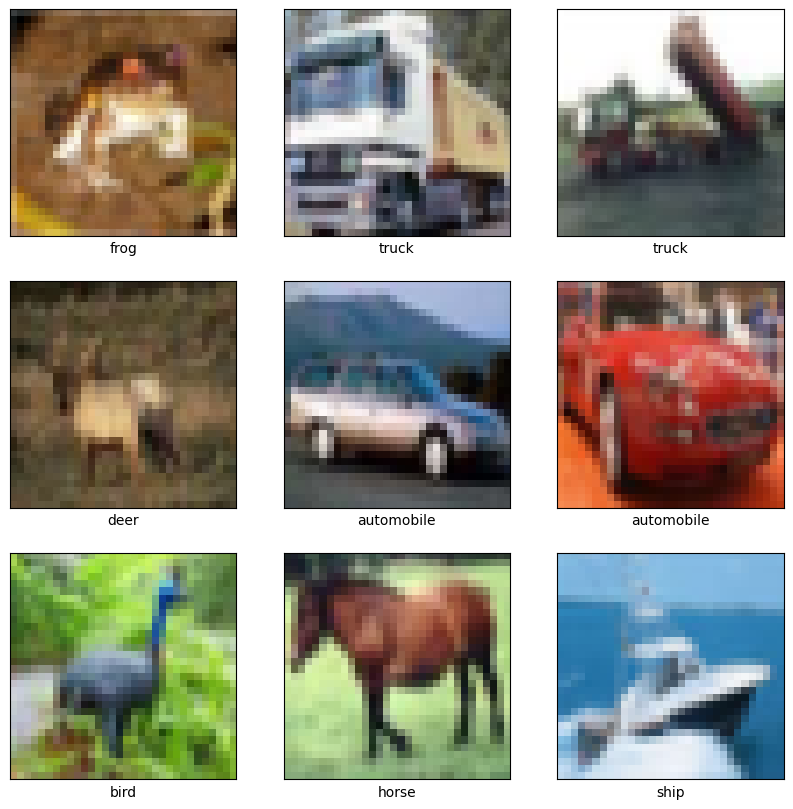

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [5]:
model = models.Sequential()

# Convolution + Pooling layers
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))

# Flatten + Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))  # 10 classes


C:\Users\engrm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [7]:
history = model.fit(train_images, train_labels,
                    epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.3637 - loss: 1.7261 - val_accuracy: 0.5461 - val_loss: 1.2640
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5576 - loss: 1.2373 - val_accuracy: 0.6186 - val_loss: 1.0826
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6229 - loss: 1.0673 - val_accuracy: 0.6021 - val_loss: 1.1084
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6613 - loss: 0.9566 - val_accuracy: 0.6688 - val_loss: 0.9501
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6937 - loss: 0.8665 - val_accuracy: 0.6767 - val_loss: 0.9435
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7111 - loss: 0.8192 - val_accuracy: 0.6917 - val_loss: 0.8811
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.7353 - loss: 0.7588 - val_accuracy: 0.6962 - val_loss: 0.8907
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7515 -

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)


313/313 - 2s - 8ms/step - accuracy: 0.6997 - loss: 0.8912

Test accuracy: 0.6996999979019165


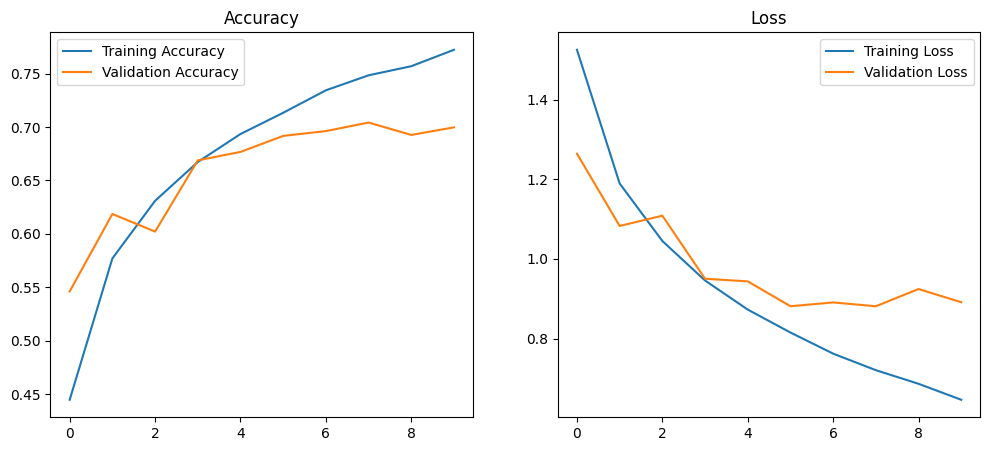

In [9]:
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [10]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


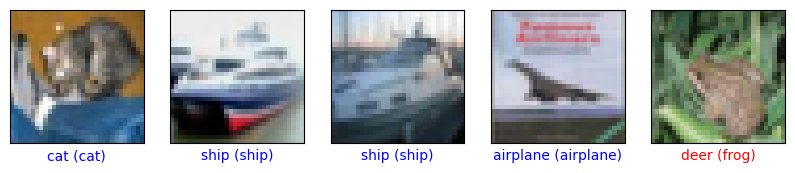

In [11]:
def plot_image(i, predictions_array, true_label, img):
    true_label = true_label[i][0]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i])

    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                class_names[true_label]),
                                color=color)

plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plot_image(i, predictions[i], test_labels, test_images)
plt.show()


**Task in PyTorch**


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cpu


In [14]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), 
                         (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True,
    download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False,
    download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=64,
    shuffle=True)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=64,
    shuffle=False)


In [16]:
class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()
        
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU()
        )
        
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x


model = BasicCNN().to(device)


In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [18]:
def train_model(model, epochs=10):
    train_acc_list = []
    test_acc_list = []

    for epoch in range(epochs):
        model.train()
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_acc = 100 * correct / total
        train_acc_list.append(train_acc)

        # Evaluate
        model.eval()
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_acc = 100 * correct / total
        test_acc_list.append(test_acc)

        print(f"Epoch [{epoch+1}/{epochs}] "
              f"Train Acc: {train_acc:.2f}% "
              f"Test Acc: {test_acc:.2f}%")

    return train_acc_list, test_acc_list


In [19]:
train_acc, test_acc = train_model(model, epochs=10)


Epoch [1/10] Train Acc: 46.98% Test Acc: 56.87%
Epoch [2/10] Train Acc: 62.30% Test Acc: 64.11%
Epoch [3/10] Train Acc: 68.97% Test Acc: 69.00%
Epoch [4/10] Train Acc: 72.95% Test Acc: 70.96%
Epoch [5/10] Train Acc: 76.13% Test Acc: 72.10%
Epoch [6/10] Train Acc: 78.73% Test Acc: 72.39%
Epoch [7/10] Train Acc: 80.77% Test Acc: 73.62%
Epoch [8/10] Train Acc: 83.05% Test Acc: 73.29%
Epoch [9/10] Train Acc: 84.77% Test Acc: 74.29%
Epoch [10/10] Train Acc: 86.51% Test Acc: 74.35%


TASK 1: Modify Architecture

In [20]:
class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256*4*4, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x


TASK 2: Improve Accuracy

In [21]:
optimizer = optim.Adam(model.parameters(), lr=0.0005)


TASK 3: Remove Overfitting

In [23]:
nn.Dropout(0.5)
nn.BatchNorm2d()
#Data Augmentation


TypeError: _BatchNorm.__init__() missing 1 required positional argument: 'num_features'

In [25]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),
                         (0.5,0.5,0.5))
])


Compare Models

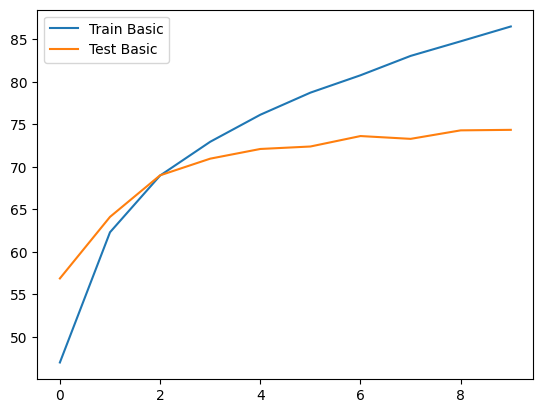

In [26]:
plt.plot(train_acc, label="Train Basic")
plt.plot(test_acc, label="Test Basic")
plt.legend()
plt.show()
